<br><br><center><h1 style="font-size:40px;color:#20B2AA">Lung Cancer Diagnosis </h1></center>
![](https://luna16.grand-challenge.org/serve/public_html/luna16_header.png/)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import glob
import os
import cv2
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import plotly.offline as py
from sklearn.metrics import precision_recall_fscore_support
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from matplotlib import pyplot

%matplotlib inline

In [46]:
_imgs_0  = []
_labels_0= []
_imgs_1  = []
_labels_1= []
for folder in glob.glob("D:\\npy\\*"):
    for file in glob.glob(os.path.join(folder,"*.npy")):
        if folder == "D:\\npy\\0":
            _imgs_0.append(np.load(file))
            _labels_0.append(0)
        elif folder == "D:\\npy\\1":
            _imgs_1.append(np.load(file))
            _labels_1.append(1)

In [47]:
_imgs = _imgs_0+ _imgs_1
_labels = _labels_0 + _labels_1
print(len(_imgs),len(_labels))

1840 1840


In [48]:
from sklearn.utils import shuffle
_imgs, _labels = shuffle(_imgs, _labels)

In [49]:
img = np.array(_imgs)
img.shape

(1840, 32, 32)

In [50]:
labels = np.array(_labels)
labels.shape

(1840,)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(img, labels, test_size=0.1, random_state=12)
y_test_original = y_test

In [57]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Activation
from keras import backend as K

In [58]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [59]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [60]:
X_train = X_train.reshape(X_train.shape[0],  32, 32, 1)
X_test  = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [61]:
X_train.shape

(1656, 32, 32, 1)

In [27]:
def model(input_shape = (32, 32, 1)):
    classifier = Sequential()
    classifier.add(Conv2D(32, (3, 3), input_shape = input_shape, padding='same', use_bias=False))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))
    classifier.add(Conv2D(32, (3, 3), use_bias=False))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))
    classifier.add(Conv2D(32, (3, 3), use_bias=False))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(units = 256, kernel_initializer='he_normal', use_bias=False))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 2, activation = 'softmax', kernel_initializer='he_normal'))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
return classifier

In [28]:
classifier = model((32, 32, 1))
classifier.fit(X_train, y_train, batch_size=196,
        epochs=20, verbose=1, validation_data=(X_test, y_test))

Train on 1656 samples, validate on 184 samples
Epoch 1/20
1656/1656 [==============================] - 33s 20ms/step - loss: 0.6571 - acc: 0.6854 - val_loss: 0.6435 - val_acc: 0.7446
Epoch 2/20
1656/1656 [==============================] - 30s 18ms/step - loss: 0.4357 - acc: 0.7874 - val_loss: 0.7627 - val_acc: 0.6739
Epoch 3/20
1656/1656 [==============================] - 30s 18ms/step - loss: 0.3462 - acc: 0.8496 - val_loss: 0.5785 - val_acc: 0.7717
Epoch 4/20
1656/1656 [==============================] - 29s 18ms/step - loss: 0.2629 - acc: 0.8925 - val_loss: 0.4984 - val_acc: 0.7989
Epoch 5/20
1656/1656 [==============================] - 30s 18ms/step - loss: 0.2099 - acc: 0.9263 - val_loss: 0.5441 - val_acc: 0.7935
Epoch 6/20
1656/1656 [==============================] - 29s 18ms/step - loss: 0.1715 - acc: 0.9378 - val_loss: 0.4627 - val_acc: 0.8424
Epoch 7/20
1656/1656 [==============================] - 30s 18ms/step - loss: 0.1376 - acc: 0.9595 - val_loss: 0.4679 - val_acc: 0.8207
E

In [44]:
classifier.save("CNN_model.h5")

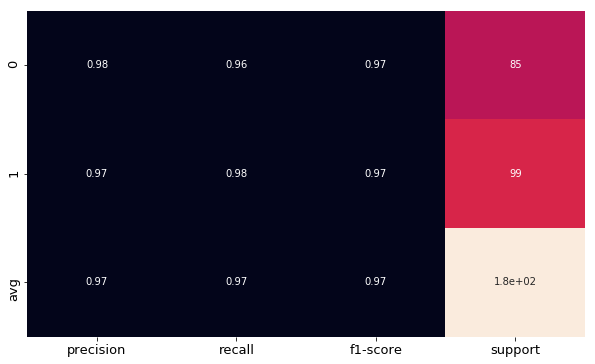

In [65]:
pr = classifier.predict_classes(X_test)
plot_classification_report(y_test_original, pr)

# Ảnh không chứa ung thư

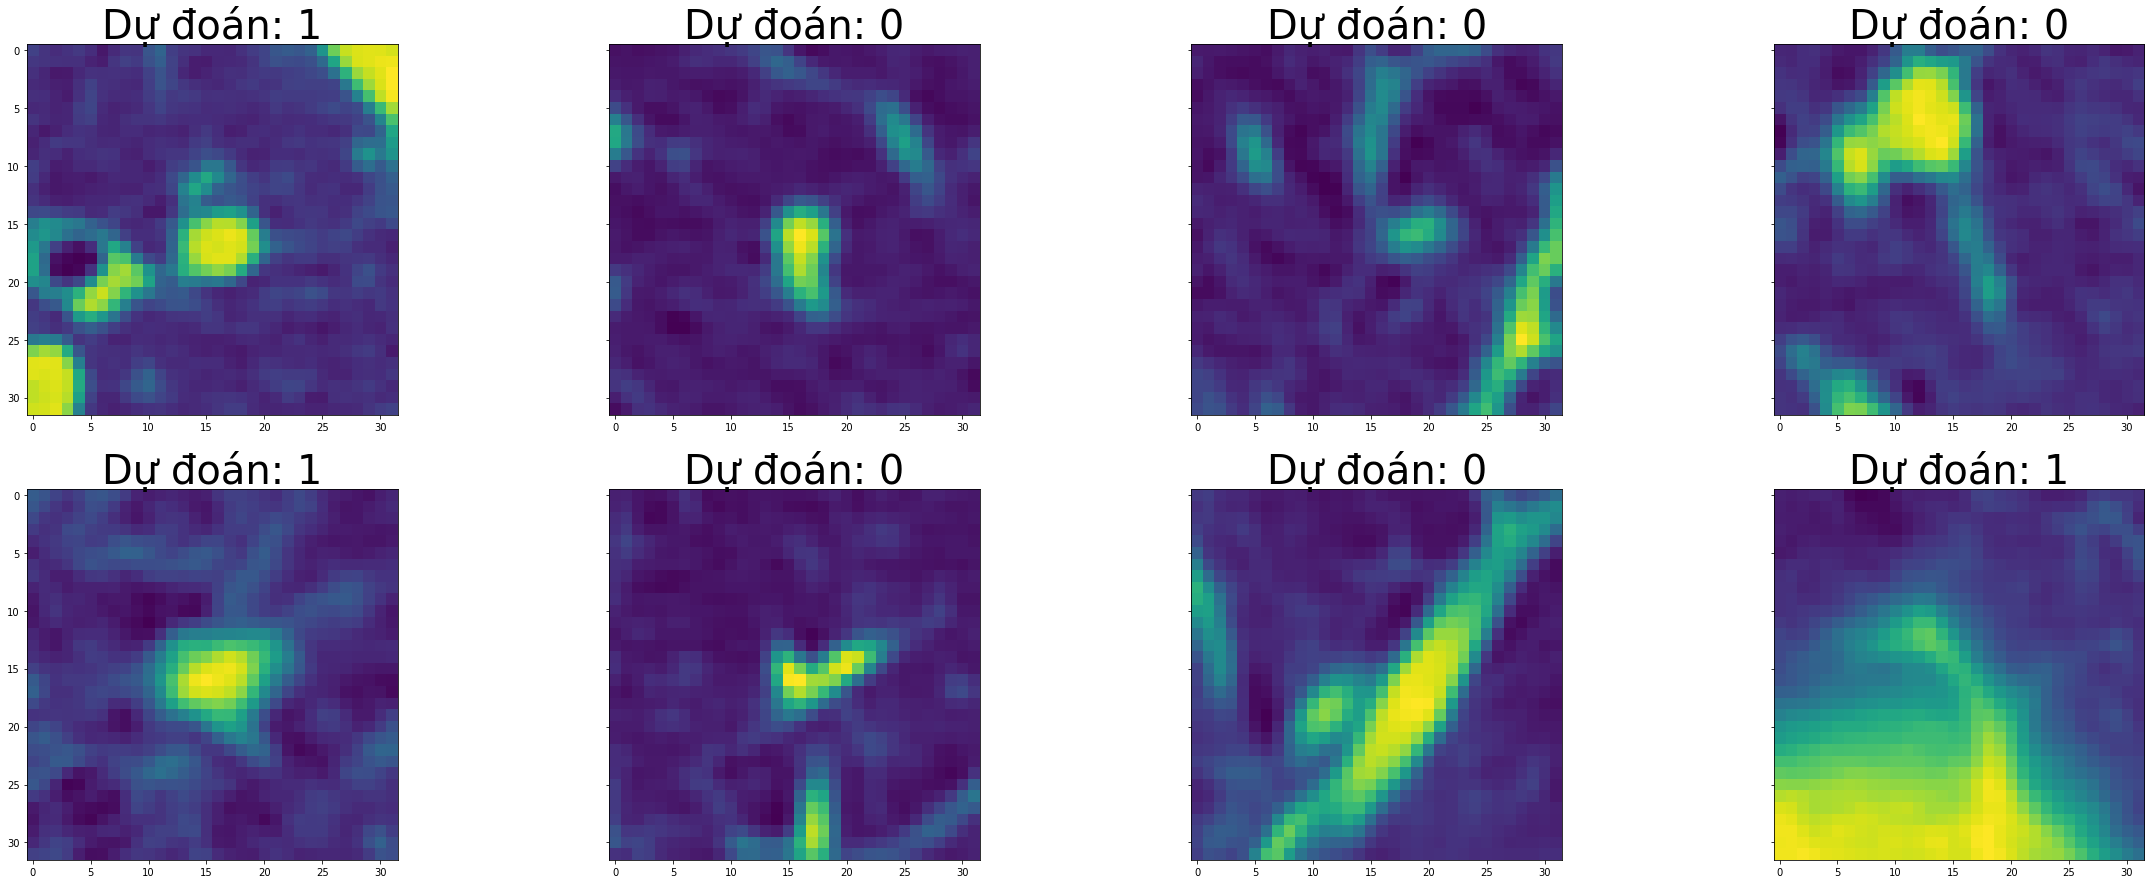

In [111]:
fig, axs = plt.subplots(2,4, figsize=(40, 15), sharey='row')
axs = axs.ravel()
_img=[]
for index,file in enumerate(glob.glob("D:\\npy\\test\\0\\*.npy")):
    _img.append(np.load(file))
    img = np.array(_img)
    img = img.astype('float32')
    img = img.reshape(img.shape[0],  32, 32, 1)
    axs[index].imshow(np.load(file))
    axs[index].set_title('Dự đoán: '+str(classifier.predict_classes(img)[index]),fontsize=40)
plt.show()

# Ảnh chứa ung thư

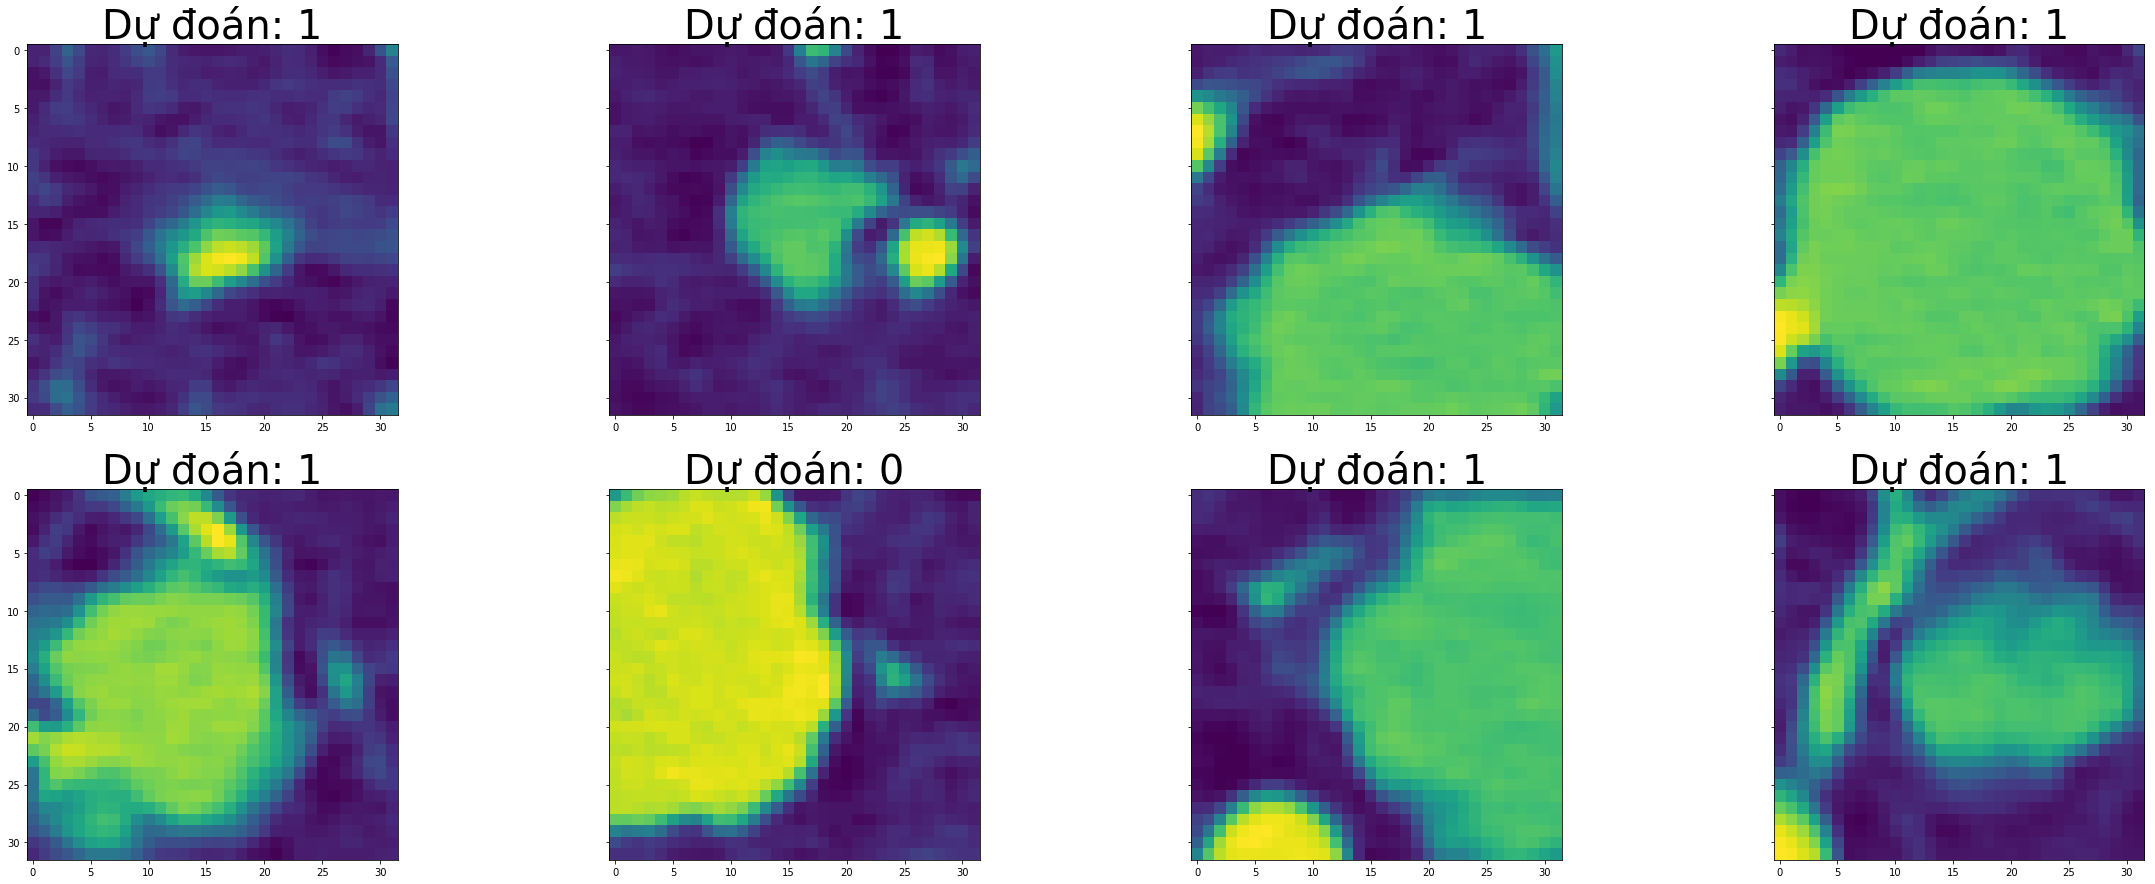

In [112]:
fig, axs = plt.subplots(2,4, figsize=(40, 15), sharey='row')
axs = axs.ravel()
_img=[]
for index,file in enumerate(glob.glob("D:\\npy\\test\\1\\*.npy")):
    _img.append(np.load(file))
    img = np.array(_img)
    img = img.astype('float32')
    img = img.reshape(img.shape[0],  32, 32, 1)
    axs[index].imshow(np.load(file))
    axs[index].set_title('Dự đoán: '+str(classifier.predict_classes(img)[index]),fontsize=40)
plt.show()

# Treatment Recommender 

In [85]:
# plot functions
def plot_2d(image,slice_step=5,col=4):   
    slice_per_row = slice_step * col
    row = int(image.shape[0]/slice_per_row)+1 # round up
    f, plots = plt.subplots(row, col, figsize=(20, 15))
    for i in range(0, image.shape[0], slice_step):
        plots[int(i / slice_per_row), int((i / slice_step) % col)].imshow(image[i], cmap=plt.cm.gray)
    for r in range(row):
        for c in range(col):
            plots[r, c].axis('off')

from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy import ndimage as ndi
from scipy import ndimage
def plot_3d(image, floor=-700):
    # Floor: lowest DU that will be visible
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces = measure.marching_cubes_classic(p, floor)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_zlabel("z-axis")
    
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()
def load_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))
    return numpyImage, numpyOrigin, numpySpacing
def resample(image, old_spacing, new_spacing=[1,1,1]):
    """
    Determine current pixel spacing
    spacing = np.array([scan[0].SliceThickness] + scan[0].PixelSpacing, dtype=np.float32)
    Parameters
    ----------
    image: numpy ndarray
    old_spacing: spacing of @image before scaled
    new_spacing: spacing of @image after scaled
    Return
    ------
    image: new scaled numpy array image
    new_spacing: can be different from the new_spacing in input
    """
    spacing = old_spacing
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    
    image = ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    new_spacing = spacing / real_resize_factor
    
    return image, new_spacing


(140, 512, 512)
[-348.  -160.  -183.3]
[2.5   0.625 0.625]
Shape before resampling	 (140, 512, 512)
Shape after resampling	 (350, 320, 320)


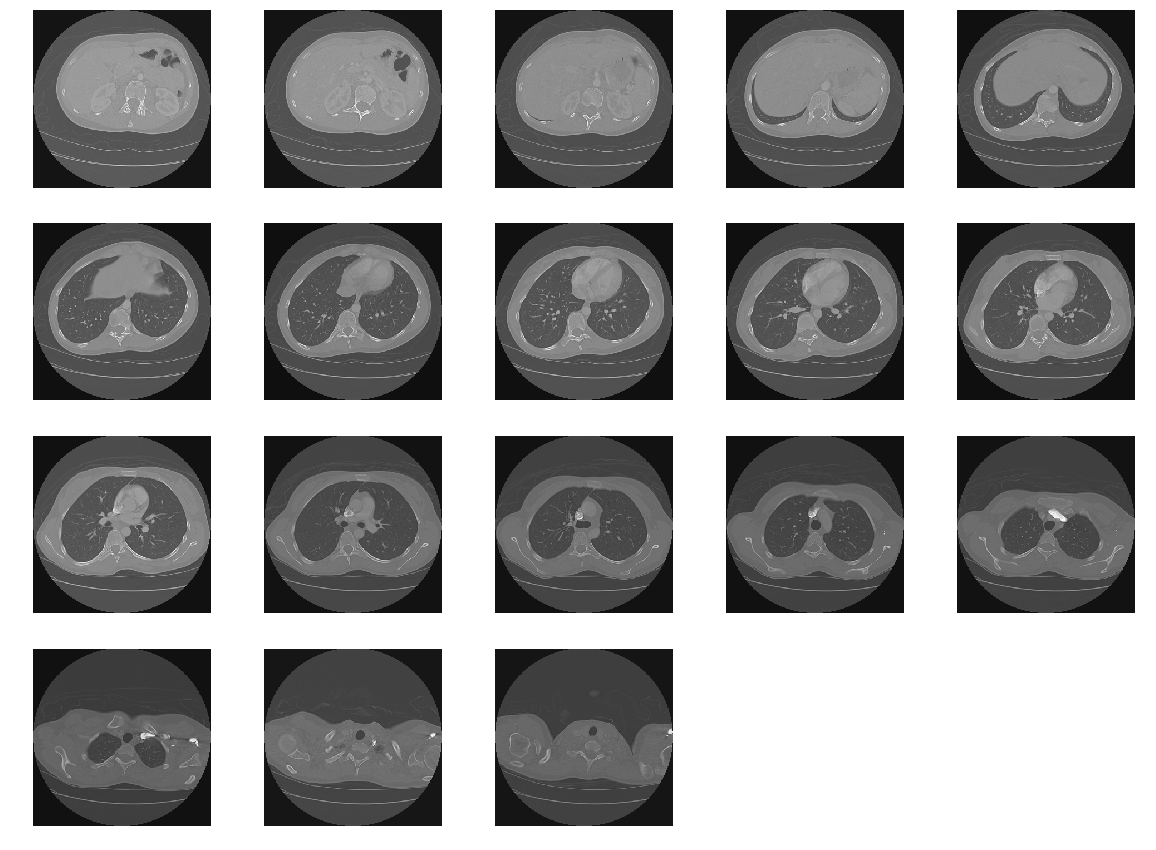

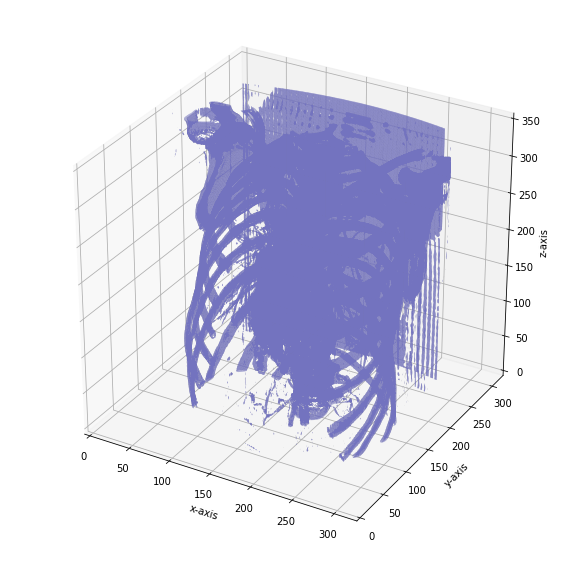

In [86]:
import SimpleITK as sitk
img_path  = 'D://subset6//1.3.6.1.4.1.14519.5.2.1.6279.6001.106630482085576298661469304872.mhd'

# load image# load i 
numpyImage, numpyOrigin, numpySpacing = load_image(img_path)
print(numpyImage.shape)
print(numpyOrigin)
print(numpySpacing)
# rni: resampled numpy image
img, spacing = resample(numpyImage, numpySpacing, [1,1,1])
print("Shape before resampling\t", numpyImage.shape)
print("Shape after resampling\t", img.shape)
plot_2d(img,slice_step=20,col=5)
# numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)
plot_3d(img,400)
plt.show()

In [235]:
import cv2
from collections import Counter
from scipy.misc import imsave

def calculate_diameter(filename):
    a = np.load(filename)
    plt.imshow(a, cmap=plt.cm.gray)
    imsave(filename.replace(".npy",".png"), a)
    img = cv2.imread(filename.replace(".npy",".png"))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=1)
    plt.imshow(sure_bg)
    sum=0
    for i in range(32):
        if Counter( sure_bg[i])[0] !=0:
            sum+=Counter( sure_bg[i])[0]
    _diameter_mm = sum *0.264583 * 0.65
    return _diameter_mm

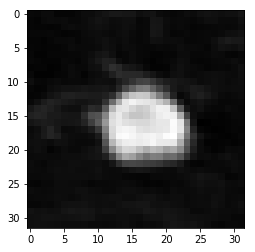

In [132]:
from scipy.misc import imsave
a = np.load("D:\\npy\\1\\1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217-124.89039040000002-124.89039040000002127.191988-473.0545483.npy")
plt.imshow(a, cmap=plt.cm.gray)
imsave('test.png', a)

Dimensions: (32, 32) Total pixels: 1024


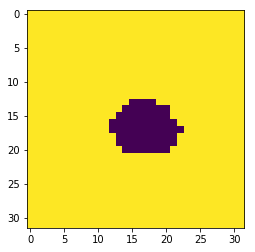

In [203]:
from PIL import Image
import os.path
import PIL
img = Image.open('test.png')

width, height = img.size
print ("Dimensions:", img.size, "Total pixels:", width * height)
import cv2
img = cv2.imread('test.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)
plt.imshow(sure_bg)

In [207]:
from collections import Counter
sum=0
for i in range(32):
    if Counter( sure_bg[i])[0] !=0:
        sum+=Counter( sure_bg[i])[0]
diameter_mm = sum *0.264583 * 0.65
diameter_mm

11.178631750000003

In [68]:
df_candidates = pd.read_csv('F:\\data\\Luna Analysis\\CSVFILES\\annotations.csv')
df_candidates.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [208]:
df_candidates[df_candidates.seriesuid == '1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217']

,seriesuid,coordX,coordY,coordZ,diameter_mm
9,1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...,-124.834262,127.247155,-473.064479,10.465854


In [250]:
# _string= "D:\\npy\\test\\0\\1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053-27.12016248-27.1201624828.31517356-64.52887426.npy"
# _string.split("\\")[4].split(".")[12]

In [10]:
from bs4 import BeautifulSoup
import requests
import re
website_url = requests.get("https://www.cancer.org/cancer/small-cell-lung-cancer/treating/by-stage.html").text
soup = BeautifulSoup(website_url,'lxml')
all_texts = (soup.find('div',{'class':'col-md-9 col-sm-12'}))
_list=[2,3,4,5,6,7]
states_dict = {(all_texts.find_all('h3')[0].text):list(map(lambda a:all_texts.find_all('p')[a].text,_list))}
_list=[6,7,8,9,10,11,12]
states_dict[(all_texts.find_all('h3')[1].text)] = list(map(lambda a: all_texts.find_all('p')[a].text,_list))

In [11]:
states_dict.keys()

dict_keys(['Stage I cancers', 'Other limited stage cancers'])

In [12]:
state_1 = ((str((states_dict['Stage I cancers'])).replace("'","")).replace("]","")).replace("[","")
state_2 = (((str((states_dict['Other limited stage cancers'])).replace("'","")).replace("]","")).replace("[","")).replace("\\n    ","")

C:\Users\PhucCoi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



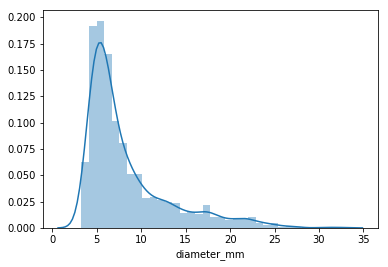

In [212]:
import seaborn as sns
sns.distplot(df_candidates.diameter_mm)

In [247]:
import imageio
from PIL import Image

from gensim.summarization import summarize
def treatments(stage):
    if stage==2:
        fig, axs = plt.subplots(1,3, figsize=(18, 18), sharey='row')
        axs = axs.ravel()
        for index, file in enumerate(glob.glob("D:\\npy\\imgs\\stage2\\*.jpg")):
            im = Image.open(file)
            im = im.resize((300,300),Image.ANTIALIAS)
            axs[index].imshow(im)
            axs[index].set_title(str(index+1)+". "+file.split('\\')[4].replace(".jpg",""),fontsize=30)
        plt.show()
    if stage==1:
        fig, axs = plt.subplots(1,3, figsize=(18, 18), sharey='row')
        axs = axs.ravel()
        for index, file in enumerate(glob.glob("D:\\npy\\imgs\\stage1\\*.jpg")):
            im = Image.open(file)
            im = im.resize((300,300),Image.ANTIALIAS)
            axs[index].imshow(im)
            axs[index].set_title(str(index+1)+". "+file.split('\\')[4].replace(".jpg",""),fontsize=30)
        plt.show()
def planning_treatments(file,word_count):
    plt.imshow(np.load(file), cmap=plt.cm.gray)
    plt.show()
    _img=[]
    _img.append(np.load(file))
    img = np.array(_img)
    img = img.astype('float32')
    img = img.reshape(img.shape[0],  32, 32, 1)
    diameter_mm = calculate_diameter(file)
    if diameter_mm > 10:
        treatments(stage=2)
        return "You're in cancer stage 2! "+summarize(state_2,word_count=word_count).replace("\n","")
    else:
        treatments(stage=1)
        return "You're in cancer stage 1! "+summarize(state_1,word_count=word_count).replace("\n","")

# Stage 2

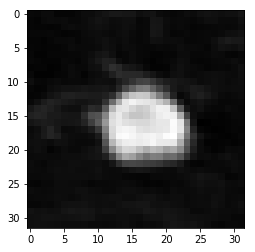

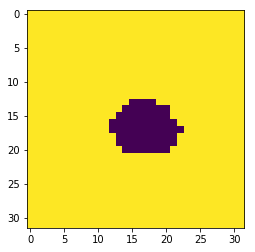

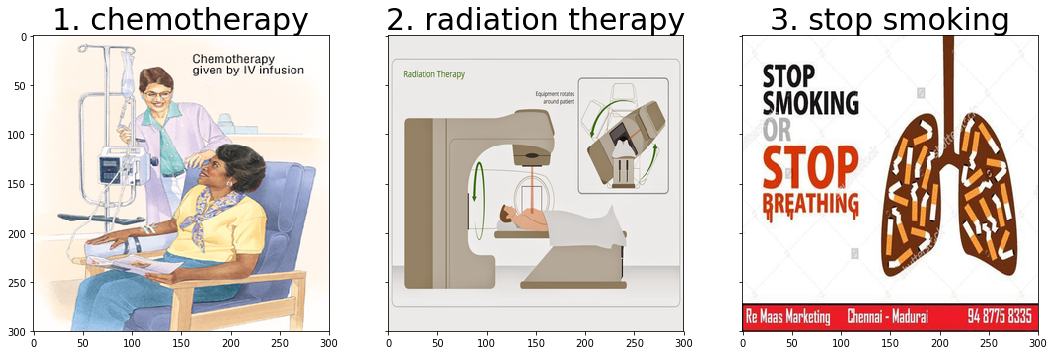

"You're in cancer stage 2! This may be followed by radiation to the chest., If no measures are taken to prevent it, about half of people with SCLC will have cancer spread to their brain.The radiation is usually given in lower doses than what is used if the cancer had already spread to brain, but some patients may still have side effects from the radiation., Most people treated with chemo (with or without radiation) for limited stage SCLC will have their tumors shrink significantly."

In [248]:
planning_treatments('D:\\npy\\1\\1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217-124.89039040000002-124.89039040000002127.191988-473.0545483.npy',100)

# Stage 1

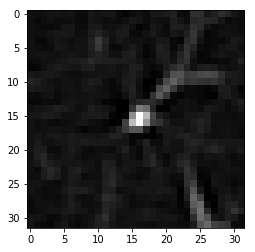

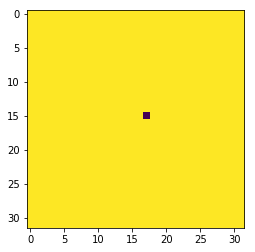

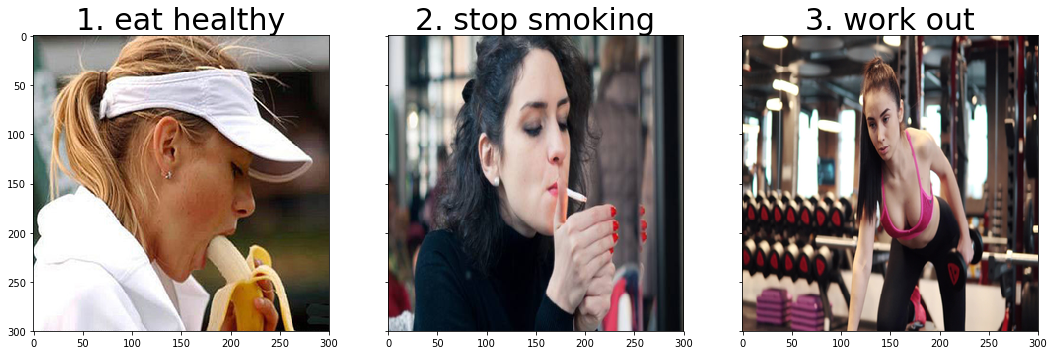

"You're in cancer stage 1! This is only an option if you are in fairly good health and can withstand having all or part of a lung removed., Before the operation, the lymph nodes in your chest will be checked for cancer spread with mediastinoscopy or other tests, because surgery is unlikely to be a good option if the cancer has spread., Surgery is generally followed by chemotherapy.If cancer is found in the lymph nodes that were removed, radiation therapy to the chest is usually advised as well.You might not be given radiation therapy if you already have severe lung disease (in addition to your cancer) or other serious health problems., In about half of people with SCLC, the cancer will eventually spread to the brain if no preventive measures are taken."

In [249]:
planning_treatments('D:\\npy\\0\\1.3.6.1.4.1.14519.5.2.1.6279.6001.10663048208557629866146930487244.9744.97-37.45-114.19.npy',100)

In [92]:
def world_to_voxel_coord(world_coord, origin, spacing):
    """
    The xspace world coordinate, for example is calculated using 
    x = v*step + start, where x is the x world coordinate and v is the 
    voxel count (starting at zero). step = spacing, start = origin.
    Parameters
    ----------
    world_coord: array, coordinate in world coordinate
    orgin:       array, origin of the world coordinate
    spacing:     array, step of the world coordinate
    Return
    ------
    voxel_coord: array, coordinate in the voxel coordinate
    """
    stretched_voxel_coord = np.absolute(world_coord - origin)
    voxel_coord = stretched_voxel_coord / spacing
    return voxel_coord

# start to create cand files
x,y,z = 60.77506053,74.1239696,-214.7823466

worldCoord = np.array([z,y,x], dtype=float)
print('world zyx: {}'.format(worldCoord))
vox_z,vox_y,vox_x = world_to_voxel_coord(worldCoord, numpyOrigin, (1,1,1))
print('voxel zyx: {},{},{}'.format(vox_z,vox_y,vox_x))
voxelWidth = 32

border_coord = min_max_coord(img, vox_z, vox_y, vox_x, voxelWidth)
vox_z_min, vox_z_max = border_coord[0:2]
vox_y_min, vox_y_max = border_coord[2:4]
vox_x_min, vox_x_max = border_coord[4:6]
                        
# create a cube from voxel coordinate
patch = img[vox_z_min : vox_z_max,
            vox_y_min : vox_y_max,
            vox_x_min : vox_x_max]
# debug
print('Final range: {}:{}, {}:{}, {}:{}'.format(vox_z_min,vox_z_max,
                                 vox_y_min,vox_y_max,
                                 vox_x_min,vox_x_max))
# patch[(patch<50)&(patch>13)]=-2048
plot_2d(patch,slice_step=1)
plt.show()
plot_3d(patch,floor = 0)
plt.show()

world zyx: [-214.7823466    74.1239696    60.77506053]
voxel zyx: 133.2176534,234.1239696,244.07506053


NameError: name 'min_max_coord' is not defined

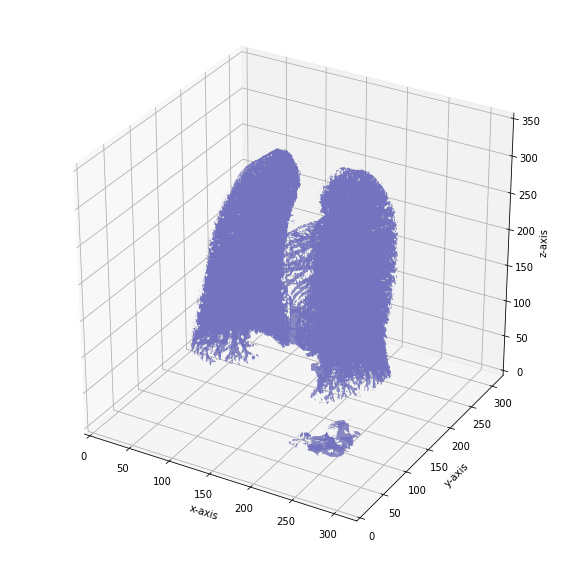

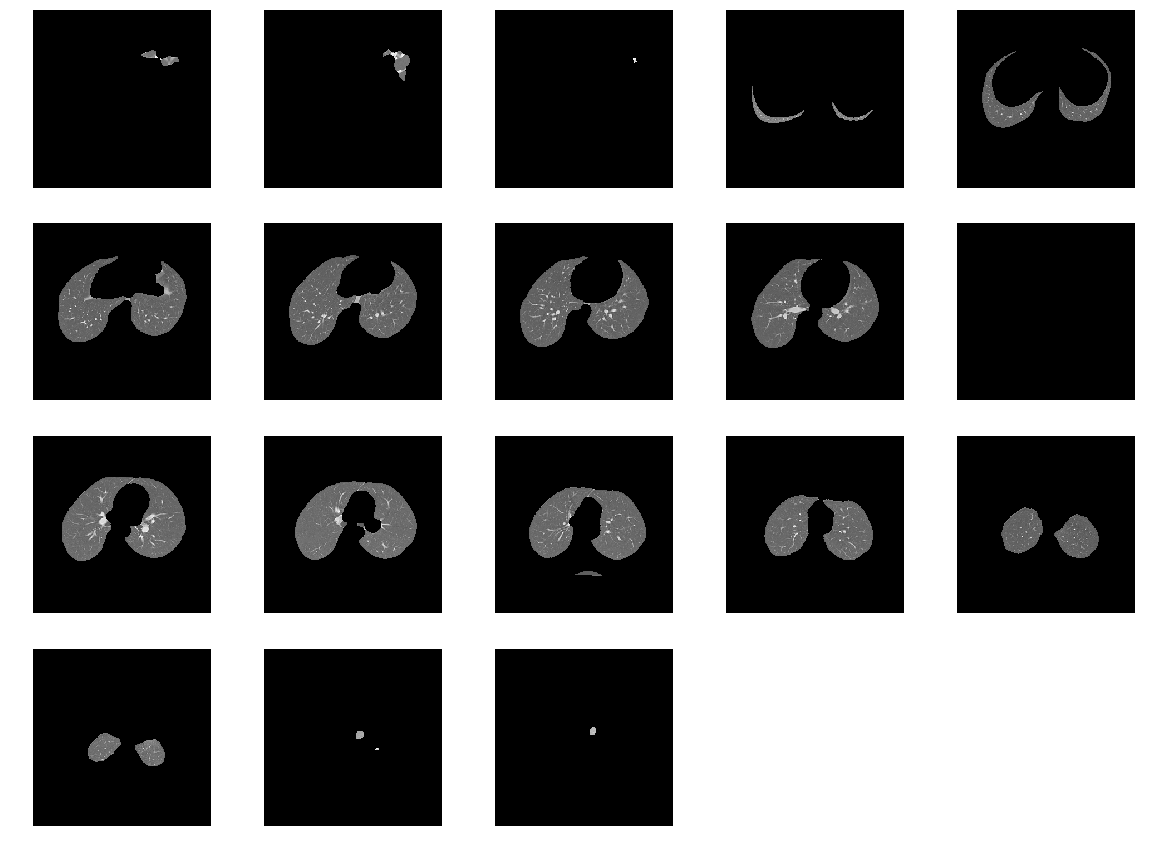

In [90]:
img = lung_segment_3d(img,plot=True)
plot_2d(img,slice_step=20,col=5)
plt.show()

array([[-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       ...,
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048],
       [-2048, -2048, -2048, ..., -2048, -2048, -2048]], dtype=int16)

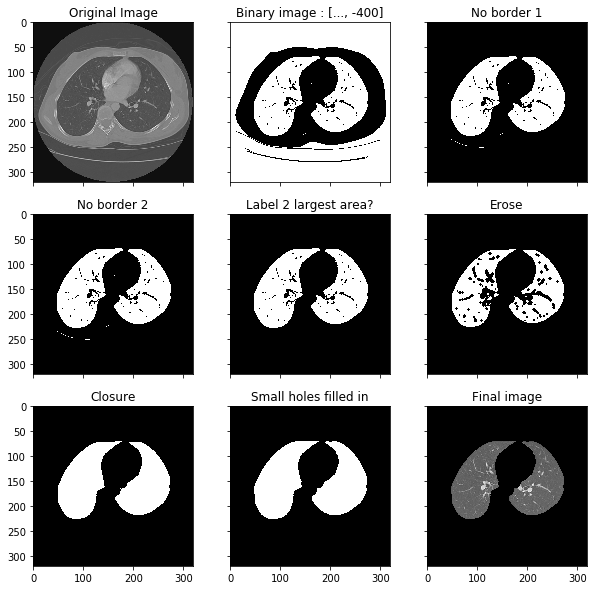

In [89]:
lung_segment_2d(img[180], plot=True)

In [112]:
# lung_segment functions
# doc: https://www.wikiwand.com/en/Hounsfield_scale
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.measure import regionprops
from skimage.morphology import disk
from skimage.morphology import binary_erosion
from skimage.morphology import binary_closing
from skimage.filters import roberts
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

def lung_segment_2d(im, ceil = -400, plot=False):
    if plot == True:
        fig, ax = plt.subplots(3, 3, figsize=(10,10),sharex=True,sharey=True)
        
    if plot==True:
        ax[0,0].title.set_text('Original Image')
        ax[0,0].imshow(im, cmap=plt.cm.gray)
        
    # STEP 1: convert to binary image
    binary = im <= ceil
    if plot==True:
        ax[0,1].imshow(binary,cmap=plt.cm.gray)
        ax[0,1].title.set_text('Binary image : [..., {}]'.format(ceil))

    # STEP 2: remove border
    binary = (clear_border(binary)) 
    if plot==True:
        ax[0,2].imshow(binary,cmap=plt.cm.gray)
        ax[0,2].title.set_text("No border 1")

    # munually remove border
    binary[375:512,:]=0
    if plot==True:
        ax[1,0].imshow(binary,cmap=plt.cm.gray)
        ax[1,0].title.set_text("No border 2")
        
    # STEP 3: label image
    binary = label(binary)
    areas = [r.area for r in regionprops(binary)]
    areas.sort()
    if len(areas) > 2:
        for region in regionprops(binary):
            if region.area < areas[-2]:
                for coordinates in region.coords:                
                       binary[coordinates[0], coordinates[1]] = 0
    binary = binary > 0
    if plot==True:
        ax[1,1].imshow(binary,cmap=plt.cm.gray)
        ax[1,1].title.set_text("Label 2 largest area?")
        
    # STEP 4: erose, separate blood vessels
    selem = disk(2)
    binary = binary_erosion(binary,selem)
    if plot==True:
        ax[1,2].imshow(binary,cmap=plt.cm.gray)
        ax[1,2].title.set_text("Erose")
        
    # STEP 5: closure operation with a disk of radius 10 to keep nodules attached to the
    # lung wall
    selem = disk(10)
    binary = binary_closing(binary,selem)
    if plot==True:
        ax[2,0].imshow(binary,cmap=plt.cm.gray)
        ax[2,0].title.set_text("Closure")
        
    # STEP 6: Fill in the small holes inside the binary mask of lungs
    edges = roberts(binary)
    binary = ndi.binary_fill_holes(edges)
    if plot==True:
        ax[2,1].imshow(binary,cmap=plt.cm.gray)
        ax[2,1].title.set_text("Small holes filled in")

    # STEP 7: superimpose the binary mask on the input image
    mask = binary == 0
    im[mask] = -2048 # the value that considered to be the background
    if plot==True:
        ax[2,2].imshow(im, cmap=plt.cm.gray)
        ax[2,2].title.set_text("Final image")
        
    return im

def lung_segment_3d(im_3d, ceil = -400, plot=False, floor_of_plot=-700):
    for slice in im_3d:
        lung_segment_2d(slice, ceil=ceil, plot=False)     
    if plot == True:
        plot_3d(im_3d,floor_of_plot)
        plt.show()
    return im_3d
# nodule_segment functions
# doc: https://pubs.rsna.org/doi/full/10.1148/radiographics.20.4.g00jl221178
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.measure import regionprops
from skimage.morphology import disk
from skimage.morphology import binary_erosion
from skimage.morphology import binary_dilation
from skimage.filters import roberts
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

def nodule_segment_2d(im, floor = 15, bg_num=-2048, plot=False):
    if plot == True:
        fig, ax = plt.subplots(3, 3, figsize=(10,10),sharex=True,sharey=True)
        
    if plot==True:
        ax[0,0].title.set_text('Original Image')
        ax[0,0].imshow(im, cmap=plt.cm.gray)
        
    # STEP 1: convert to binary image
    binary = im >= floor
    
    if plot==True:
        ax[0,1].imshow(binary,cmap=plt.cm.gray)
        ax[0,1].title.set_text('Binary image : [{},...]'.format(floor))
        
    # STEP 2: remove border
    binary = (clear_border(binary)) 
    if plot==True:
        ax[0,2].imshow(binary,cmap=plt.cm.gray)
        ax[0,2].title.set_text("No border 1")
    
    # STEP 3: erose, separate blood vessels
    selem = disk(2)
    binary = binary_erosion(binary,selem)
    if plot==True:
        ax[1,0].imshow(binary,cmap=plt.cm.gray)
        ax[1,0].title.set_text("Erose")
    
    # STEP 4: label image
    binary = label(binary)
    if plot==True:
        ax[1,1].imshow(binary,cmap=plt.cm.gray)
        ax[1,1].title.set_text("Label")
        
    areas = [r.area for r in regionprops(binary)]
    areas.sort()
    if len(areas) > 1:
        for region in regionprops(binary):
            if region.area < areas[-1]:
                for coordinates in region.coords:                
                       binary[coordinates[0], coordinates[1]] = 0
    binary = binary > 0
    if plot==True:
        ax[1,2].imshow(binary,cmap=plt.cm.gray)
        ax[1,2].title.set_text("Label 2 largest area?")
        
    # STEP 5: dilation
    selem = disk(4)
    binary = binary_dilation(binary,selem)
    if plot==True:
        ax[1,2].imshow(binary,cmap=plt.cm.gray)
        ax[1,2].title.set_text("dilation")
    if plot==True:
        ax[2,0].axis('off')
        ax[2,1].axis('off')

    # STEP 7: superimpose the binary mask on the input image
    mask = binary == 0
    im[mask] = bg_num # the value that considered to be the background
    if plot==True:
        ax[2,2].imshow(im, cmap=plt.cm.gray)
        ax[2,2].title.set_text("Final image")
    return im

def nodule_segment_3d(im_3d, floor = 15, bg_num = -2048, plot=False, floor_of_plot=0):
    for slice in im_3d:
        nodule_segment_2d(slice, floor=floor, bg_num=bg_num, plot=False)     
    if plot == True:
        plot_3d(im_3d,floor_of_plot)
        plt.show()
    return im_3d